<a href="https://colab.research.google.com/github/Shubham91999/VectorDB-Semantic-Searching/blob/main/Semantic_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Representing words as numbers**




In [1]:
def integer_encode(text):
    # Split the text into words
    words = text.split()

    # Create a dictionary to store word-to-integer mappings
    word_to_int = {}

    # Create a list to store the integer representation
    integer_encoded = []

    # Counter for assigning new integers
    current_integer = 0

    for word in words:
        # Convert word to lowercase for consistency
        word = word.lower()

        # Remove punctuation (you might want to handle this more thoroughly in a real application)
        word = word.strip('.,!?')

        if word not in word_to_int:
            # If it's a new word, assign it the next integer
            word_to_int[word] = current_integer
            current_integer += 1

        # Append the integer representation of the word
        integer_encoded.append(word_to_int[word])

    return integer_encoded, word_to_int

# Example usage
text = "The dog looked at the other dog."
encoded, word_map = integer_encode(text)

print("Original text:", text)
print("Integer encoded:", encoded)
print("Word to integer mapping:", word_map)

# Decode the integers back to words (for verification)
decoded = ' '.join([list(word_map.keys())[list(word_map.values()).index(i)] for i in encoded])
print("Decoded text:", decoded)

Original text: The dog looked at the other dog.
Integer encoded: [0, 1, 2, 3, 0, 4, 1]
Word to integer mapping: {'the': 0, 'dog': 1, 'looked': 2, 'at': 3, 'other': 4}
Decoded text: the dog looked at the other dog


**TF-IDF Matrix Representation**

In [2]:
import spacy
import pandas as pd

In [3]:
# !python -m spacy download en_core_web_md

In [4]:
# !python -m spacy download en_core_web_lg

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
nlp = spacy.load("en_core_web_md")

corpus = [
    "The dog likes the other dog.",
    "The lazy dog sleeps all day.",
    "The quick brown fox is cunning."
]

tokenized_corpus = []

for text in corpus:
  tokenized_text = []
  doc = nlp(text)

  for token in doc:
    if not token.is_stop:
      tokenized_text.append(token.text.lower())
  tokenized_corpus.append(' '.join(tokenized_text))

print(tokenized_corpus)

['dog likes dog .', 'lazy dog sleeps day .', 'quick brown fox cunning .']


In [7]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(tokenized_corpus)

print("Feature names:", vectorizer.get_feature_names_out())
print("Document-term matrix:\n", X.toarray())

Feature names: ['brown' 'cunning' 'day' 'dog' 'fox' 'lazy' 'likes' 'quick' 'sleeps']
Document-term matrix:
 [[0 0 0 2 0 0 1 0 0]
 [0 0 1 1 0 1 0 0 1]
 [1 1 0 0 1 0 0 1 0]]


Better way to view this is as a Pandas Dataframe

In [8]:
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
df

,brown,cunning,day,dog,fox,lazy,likes,quick,sleeps
0,0,0,0,2,0,0,1,0,0
1,0,0,1,1,0,1,0,0,1
2,1,1,0,0,1,0,0,1,0


**Word Vector with SpaCy**

In [9]:
word = 'dog'

token = nlp(word)[0]
vector = token.vector

print(vector)

[-0.72483    0.42538    0.025489  -0.39807    0.037463  -0.29811
 -0.28279    0.29333    0.57775    1.2205    -0.27903    0.80879
 -0.71291    0.045808  -0.46751    0.55944    0.42745    0.58238
  0.20854   -0.42718   -0.40284   -0.048941   0.1149    -0.6963
 -0.03338    0.052596  -0.22572   -0.35996    0.47961   -0.38386
 -0.73837    0.1718     0.52188    0.45584   -0.026621   0.48831
  0.67996   -0.73345   -0.27078    0.41739    0.1947     0.27389
 -0.70931   -0.45317   -0.22574   -0.12617    0.03268    0.142
  0.53923   -0.61285   -0.5322     0.19479    0.13889   -0.020284
  0.088162   0.85337    0.039407   0.11529   -0.42646    0.74832
  0.34421   -0.59462    0.0040537  0.027203  -0.063394   0.26538
  0.34757    0.21395   -0.39799   -0.027067  -0.36132    0.31979
  0.55813   -0.5652     0.55382    0.03928   -0.26933   -0.14705
  0.74032   -0.50566    0.023765   0.62273   -0.79388   -0.25165
  0.11992   -0.43056    1.0614     0.58571    0.8856    -0.056054
  0.055826   0.30485    0.

**Comparing two words**

In [10]:
def compare_words(w1: str, w2: str) -> None:
  token1 = nlp(w1)[0]
  token2 = nlp(w2)[0]

  similarity = token1.similarity(token2)

  print(f"Similarity between '{w1}' and '{w2}': {similarity:.4f}")

compare_words('dog', 'cat')

compare_words('dog', 'bread')

compare_words('cat', 'bread')


Similarity between 'dog' and 'cat': 1.0000
Similarity between 'dog' and 'bread': 0.2796
Similarity between 'cat' and 'bread': 0.2796


In [11]:
# Compare dog and cat
compare_words("baker", "bread")

# Compare dog and bread
compare_words("france", "bread")

# Optional: Let's also compare cat and bread for a complete picture
compare_words("french", "bread")

compare_words("FRENCH", "bread")


Similarity between 'baker' and 'bread': 0.0908
Similarity between 'france' and 'bread': 0.1627
Similarity between 'french' and 'bread': 0.1684
Similarity between 'FRENCH' and 'bread': 0.1684


**Word Embeddings in Two-Dimensional Space**

Steps:
1. Load spaCy model to get the word vectors for our chosen words
2. PCS to reduce dimensions to just 2 dimensions
3. Plot 2D (PCA generated 2 dimensions) on a scatter plot, with each word labeled
4. Calculate and print the distances between each pair of words in this 2D space

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

Plot saved as 'word_embeddings_2d.svg'


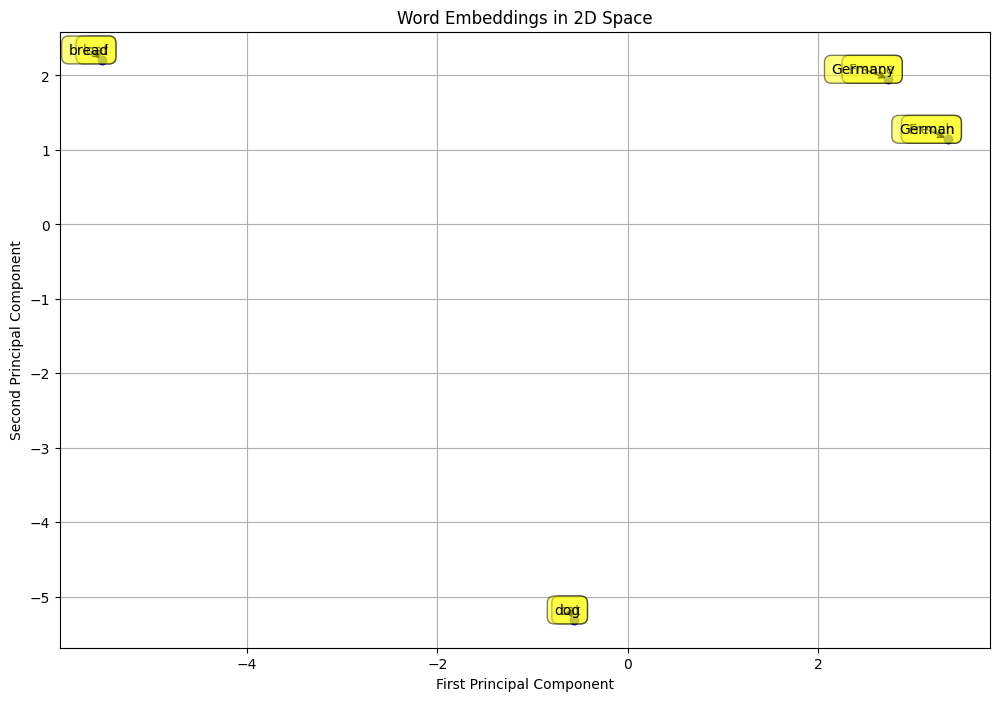

In [13]:
import os
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

words = ["cat", "dog", "loaf", "bread", "French", "France", "Germany", "German"]

vectors = [nlp(word).vector for word in words]

pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)

plt.figure(figsize=(12, 8))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], c='b', alpha=0.7)

for i, word in enumerate(words):
  plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]), xytext=(5, 2),
               textcoords='offset points', ha='right', va='bottom',
               bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                 arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))


plt.title("Word Embeddings in 2D Space")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.grid(True)

# Create the output directory if it doesn't exist
os.makedirs('../outputs/', exist_ok=True)

# Instead of plt.show(), we'll save the plot as an SVG
plt.savefig('../outputs/word_embeddings_2d.svg', format='svg')
print("Plot saved as 'word_embeddings_2d.svg'")

Words with similar meanings or uses tend to cluster together in the vector space, while words with different meanings are farther apart. Even in this simplified 2D representation, we can see how the embedding space organizes words in a way that reflects their semantic relationships.

**Distances between word pairs**

In [17]:
for i in range(len(words)):
  for j in range(i+1, len(words)):
    dist = np.linalg.norm(vectors_2d[i] - vectors_2d[j])
    print(f"{words[i]} - {words[i+1]}: {dist:.4f}")

cat - dog: 0.0000
cat - dog: 9.0046
cat - dog: 9.0046
cat - dog: 7.5554
cat - dog: 7.9777
cat - dog: 7.9777
cat - dog: 7.5554
dog - loaf: 9.0046
dog - loaf: 9.0046
dog - loaf: 7.5554
dog - loaf: 7.9777
dog - loaf: 7.9777
dog - loaf: 7.5554
loaf - bread: 0.0000
loaf - bread: 8.9453
loaf - bread: 8.2641
loaf - bread: 8.2641
loaf - bread: 8.9453
bread - French: 8.9453
bread - French: 8.2641
bread - French: 8.2641
bread - French: 8.9453
French - France: 1.0180
French - France: 1.0180
French - France: 0.0000
France - Germany: 0.0000
France - Germany: 1.0180
Germany - German: 1.0180


Key Observations:

1. **Animal Cluster**: "Cat" and "dog" should be relatively close, reflecting their semantic similarity as common pets.
2. **Food Cluster**: "Loaf" and "bread" should be close, given their related meanings.
3. **Country-Language Pairs**: "France" and "French" should be very close, as should "Germany" and "German".
4. **Semantic Categories**: The animal words, food words, and country/language words should form distinct clusters, relatively far from each other.

**Document Embeddings**

In [18]:
nlp = spacy.load("en_core_web_md")
# Sample news headlines
headlines = [
    # Sports
    "Lakers Clinch Playoff Spot with Overtime Victory",
    "Mediterranean Sailing Competition leads to French Victory",
    "Olympic Committee Adds Breakdancing as 2024 Event",
    # Weather
    "Hurricane Ian Makes Landfall in Florida",
    "Record-Breaking Heatwave Sweeps Across Europe",
    "Blizzard Warning Issued for Northeast States",
    # Food
    "New Study Links Mediterranean Diet to Longevity",
    "Michelin Guide Adds Five New 3-Star Restaurants",
    "The Best food in NYC",
]

categories = ["Sports", "Sports", "Sports", "Weather", "Weather", "Weather", "Food", "Food", "Food"]

In [19]:
vectors = [nlp(headline).vector for headline in headlines]

In [21]:
pcs = PCA(n_components=2)
vectors_2d = pcs.fit_transform(vectors)

Plot saved as 'sentence_embeddings_2d.svg'


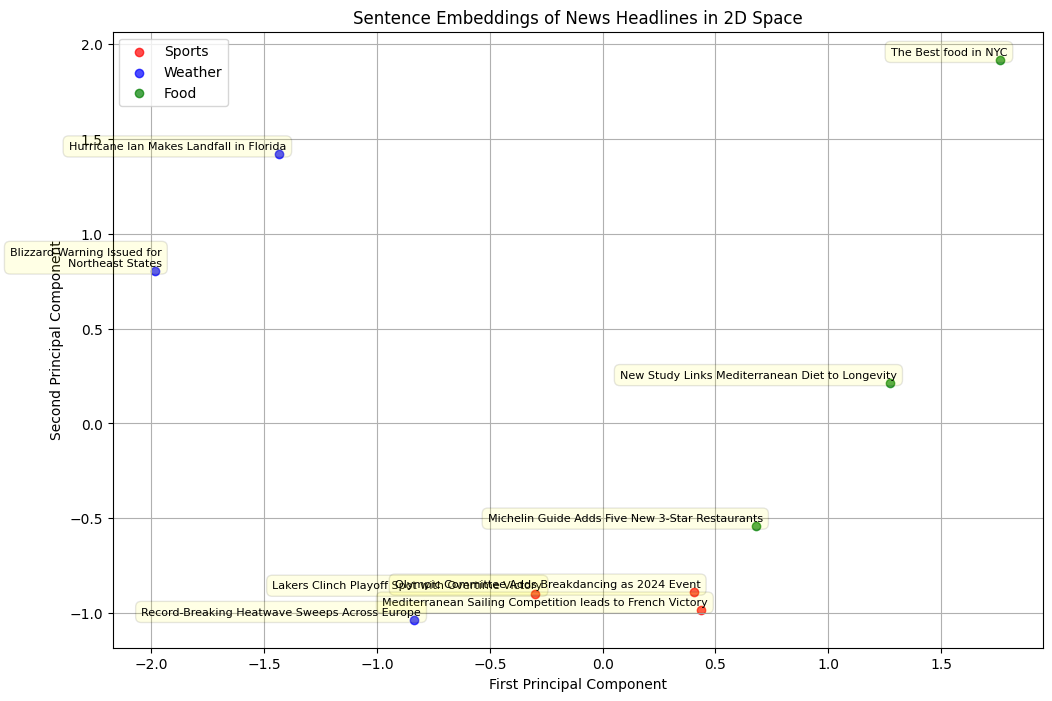

In [23]:
# Plot the sentences in 2D space
plt.figure(figsize=(12, 8))

colors = {'Sports': 'red', 'Weather': 'blue', 'Food': 'green'}
for i, (headline, category) in enumerate(zip(headlines, categories)):
    plt.scatter(vectors_2d[i, 0], vectors_2d[i, 1], c=colors[category], alpha=0.7)
    plt.annotate(headline, (vectors_2d[i, 0], vectors_2d[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom',
                 bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.1),
                 fontsize=8, wrap=True)

plt.title("Sentence Embeddings of News Headlines in 2D Space")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.grid(True)

# Add a legend
for category, color in colors.items():
    plt.scatter([], [], c=color, alpha=0.7, label=category)
plt.legend()

# Save the plot as an SVG
plt.savefig('../outputs/sentence_embeddings_2d.svg', format='svg', bbox_inches='tight')
print("Plot saved as 'sentence_embeddings_2d.svg'")

Document embeddings using **en_core_web_lg** model

In [24]:
nlp2 = spacy.load("en_core_web_lg")


In [25]:
vectors2 = [nlp2(headline).vector for headline in headlines]

In [27]:
vectors2_2d = pcs.fit_transform(vectors2)

Plot saved as 'sentence_embeddings_lg_2d.svg'


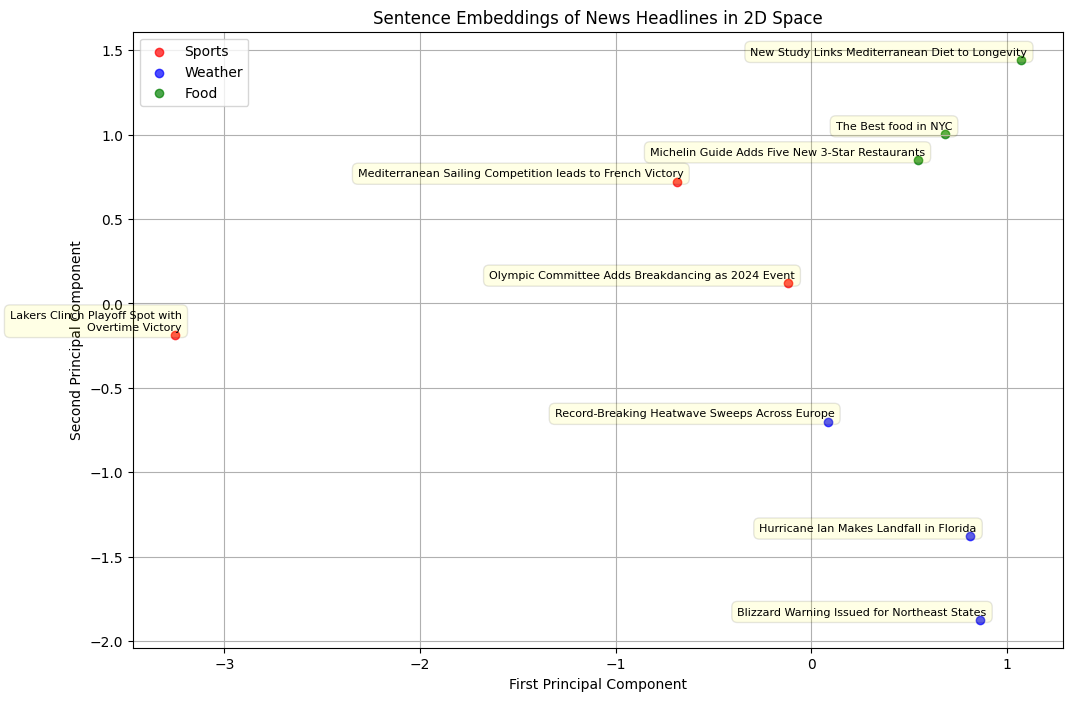

In [29]:
# Plot the sentences in 2D space
plt.figure(figsize=(12, 8))

colors = {'Sports': 'red', 'Weather': 'blue', 'Food': 'green'}
for i, (headline, category) in enumerate(zip(headlines, categories)):
    plt.scatter(vectors2_2d[i, 0], vectors2_2d[i, 1], c=colors[category], alpha=0.7)
    plt.annotate(headline, (vectors2_2d[i, 0], vectors2_2d[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom',
                 bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.1),
                 fontsize=8, wrap=True)

plt.title("Sentence Embeddings of News Headlines in 2D Space")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.grid(True)

# Add a legend
for category, color in colors.items():
    plt.scatter([], [], c=color, alpha=0.7, label=category)
plt.legend()

# Save the plot as an SVG
plt.savefig('../outputs/sentence_embeddings_lg_2d.svg', format='svg', bbox_inches='tight')
print("Plot saved as 'sentence_embeddings_lg_2d.svg'")

**Transformers based word embeddings**

Advantages of using Transformers based text Embeddings:
1. **Contexual Embeddings**: Unlike statis embeddings (Word2Vec, GloVe), Transformer models produce contextual embeddings. This allows the same word to have different embeddings based on its context in a sentence.

2. **Handling Polysemy**: Because of these contextual embeddings, Transformers can better handle words with multiple meanings (polysemy). For example, bank -> river bank, bank account

3. **Capturing Long-range Dependencies**: Self-attention allosws to capture relationships between words that are far apart in a sentence, something thta was challenging in previous models.

4. **Subword Tokenization**: Many Transformer models use subword tokenization, allowing them to handle out-of-vocabulary words and capture morphological information.

5. **Transfer Learning**: Pre-trained Transformer models can be fine-tuned on specific tasks with relatively small amounts of labeled data, leading to state-of-the-art performance on many NLP tasks.

6. **Sentence-level Understanding**: Transformers are trained to understand entire sentences or even paragraphs, not just individual words. This leads to more meaningful sentence-level embeddings.

In [30]:
from sentence_transformers import SentenceTransformer

In [ ]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [33]:
vectors = model.encode(headlines)

vectors_trans_2d = pca.fit_transform(vectors)

Plot saved as 'sentence_embeddings_2d_transformers.svg'


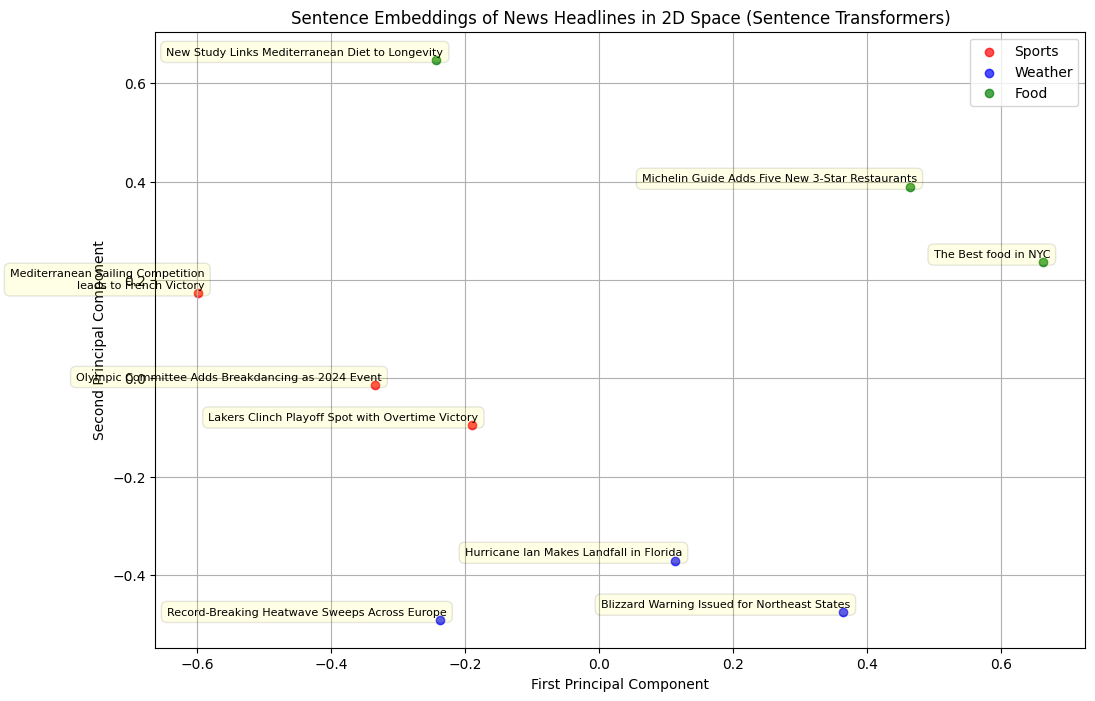

In [35]:
# Plot the sentences in 2D space
plt.figure(figsize=(12, 8))

colors = {'Sports': 'red', 'Weather': 'blue', 'Food': 'green'}
for i, (headline, category) in enumerate(zip(headlines, categories)):
    plt.scatter(vectors_trans_2d[i, 0], vectors_trans_2d[i, 1], c=colors[category], alpha=0.7)
    plt.annotate(headline, (vectors_trans_2d[i, 0], vectors_trans_2d[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom',
                 bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.1),
                 fontsize=8, wrap=True)

plt.title("Sentence Embeddings of News Headlines in 2D Space (Sentence Transformers)")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.grid(True)

# Add a legend
for category, color in colors.items():
    plt.scatter([], [], c=color, alpha=0.7, label=category)
plt.legend()

# Save the plot as an SVG
plt.savefig('../outputs/sentence_embeddings_2d_transformers.svg', format='svg', bbox_inches='tight')
print("Plot saved as 'sentence_embeddings_2d_transformers.svg'")